In [2]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="ticks", palette="pastel")
plt.rcParams['figure.dpi'] = 96

sns.set_context("paper")

In [3]:
df_dutch = pd.read_excel("42256_2020_253_MOESM1_ESM.xlsx")

df_chinese = pd.read_excel("time_series_375_prerpocess_en.xlsx", index_col=[0, 1])
df_chinese = df_chinese.groupby('PATIENT_ID').last()

In [4]:
df_dutch.head()

,Age,Gender,Date of presentation emergency room,Date of admission,Date of discharge,Admission to ICU,Survival/death,Date of death,Days from admission to death,Date blood analysis,LD,CRP,Lymphocytes,Leukocytes,Percentage lymphocytes
0,73,Male,2020-03-19,2020-03-19 00:00:00,2020-05-26 00:00:00,Yes,Alive,NaT,NaN,2020-03-19,485,154,0.62,6.6,9.393939
1,60,Female,2020-03-18,2020-03-18 00:00:00,2020-03-22 00:00:00,No,Alive,NaT,NaN,2020-03-20,316,77,1.61,7.7,20.909091
2,44,Female,2020-03-20,2020-03-20 00:00:00,2020-03-24 00:00:00,No,Alive,NaT,NaN,2020-03-20,444,82,0.81,6.8,11.911765
3,58,Male,2020-03-20,2020-03-20 00:00:00,2020-03-23 00:00:00,Yes,Alive,NaT,NaN,2020-03-20,323,58,0.73,5.8,12.586207
4,66,Male,2020-03-20,2020-03-20 00:00:00,2020-03-25 00:00:00,No,Alive,NaT,NaN,2020-03-20,244,20,1.39,5.1,27.254902


In [5]:
df_dutch.shape

(305, 15)

In [6]:
df_chinese.head()

,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,procalcitonin,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,High sensitivity C-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
1,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,131.0,100.0,12.4,0.09,...,32.3,38.9,2.6,0.09,142.7,0.16,41.0,30.0,74.7,88.0
2,61,1,2020-02-04 21:39:03,2020-02-19 12:59:01,0,1.9,149.0,98.1,12.3,0.09,...,32.2,36.0,27.4,NaN,137.4,0.27,40.0,22.0,94.6,74.0
3,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,NaN,126.0,102.2,13.6,0.06,...,33.3,34.8,3.6,0.10,143.2,0.23,29.0,67.0,84.6,64.0
4,74,1,2020-01-31 23:03:59,2020-02-18 12:59:12,0,4.8,103.0,103.1,16.3,0.38,...,39.2,NaN,14.5,0.11,144.2,0.27,72.0,26.0,74.2,88.0
5,29,2,2020-02-01 20:59:54,2020-02-18 10:33:06,0,5.6,130.0,102.2,14.6,0.02,...,30.0,NaN,0.8,0.08,143.6,0.36,11.0,18.0,122.8,54.0


In [7]:
df_chinese.shape

(375, 79)

### Age distribution

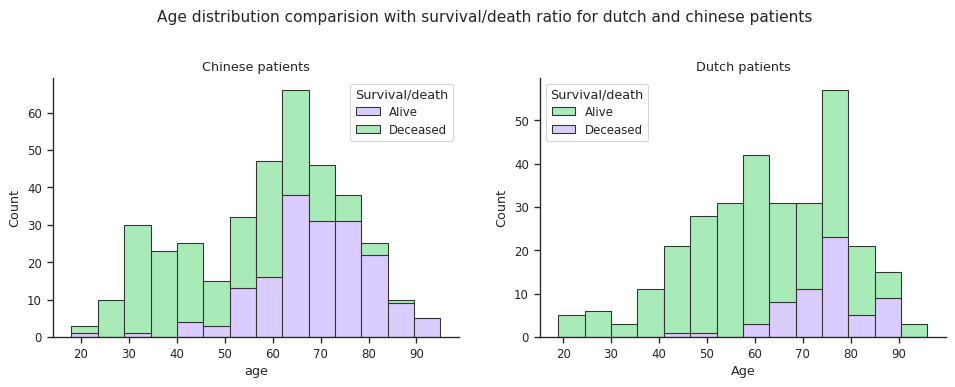

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Age distribution comparision with survival/death ratio for dutch and chinese patients")

sns.histplot(df_chinese, x="age", hue="outcome",
        multiple="stack",
        bins=14,
        edgecolor=".2",
        ax=ax[0],
        palette=["g", "m"])
ax[0].set_title("Chinese patients")
ax[0].legend(title='Survival/death', labels=['Alive', 'Deceased'])


sns.histplot(df_dutch, x="Age", hue="Survival/death",
        multiple="stack",
        edgecolor=".2",
        bins=14,
        ax=ax[1],
        palette=["g", "m"])
ax[1].set_title("Dutch patients")
plt.subplots_adjust(top=0.8)
sns.despine()
plt.subplots_adjust(wspace=0.2, top=0.8)
plt.show()
fig.savefig('age_dist.png', dpi=fig.dpi)

In [67]:
df_dutch["Survival/death"].value_counts()

Alive       244
Deceased     61
Name: Survival/death, dtype: int64

In [68]:
df_chinese["outcome"].value_counts()

0    201
1    174
Name: outcome, dtype: int64

### Lactate dehydrogenase

This feature has the most influence on the predictions in chinese dataset.

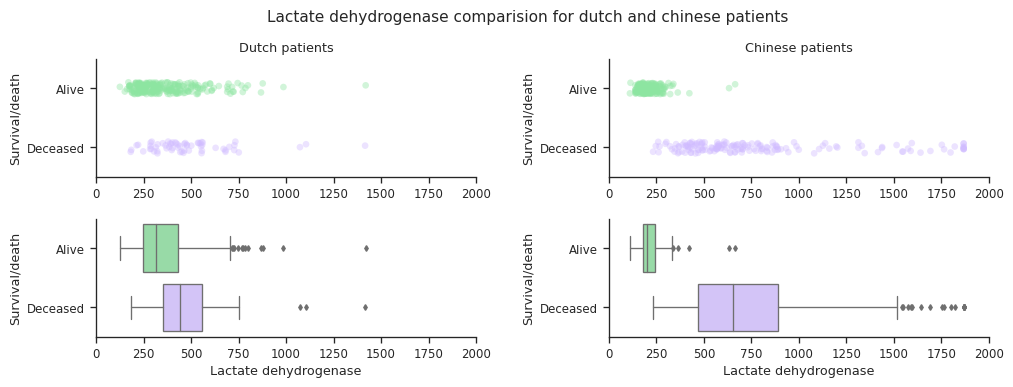

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4))
fig.suptitle("Lactate dehydrogenase comparision for dutch and chinese patients")

sns.stripplot(x="LD", y="Survival/death",
              data=df_dutch, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][0])
ax[0][0].set_title("Dutch patients")
ax[0][0].set(xlim=(0, 2000))
ax[0][0].set(xlabel="")

sns.stripplot(x="Lactate dehydrogenase", y=df_chinese["outcome"].astype(str),
              data=df_chinese, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][1])
ax[0][1].set_title("Chinese patients")
ax[0][1].set(xlim=(0, 2000))
ax[0][1].set(ylabel="Survival/death")
ax[0][1].set_yticklabels(["Alive", "Deceased"])
ax[0][1].set(xlabel="")

sns.boxplot(y="Survival/death", x="LD", data=df_dutch, ax=ax[1][0], palette=["g", "m"], linewidth=1, fliersize=3)
ax[1][0].set(xlim=(0, 2000))
ax[1][0].set(xlabel="Lactate dehydrogenase")

sns.boxplot(y=df_chinese["outcome"].astype(str), x="Lactate dehydrogenase", data=df_chinese, ax=ax[1][1], palette=["g", "m"],linewidth=1, fliersize=3)
ax[1][1].set(xlim=(0, 2000))
ax[1][1].set(ylabel="Survival/death")
ax[1][1].set_yticklabels(["Alive", "Deceased"])

plt.subplots_adjust(wspace=0.35, hspace=0.35, top=0.85)

sns.despine()
fig.savefig('ldh_dutch.png', dpi=fig.dpi)
plt.show()

Now, it is clear that the feature that separates the chinese patients really well, does not separate the dutch patients at all.

### Other features
#### Lymphocytes

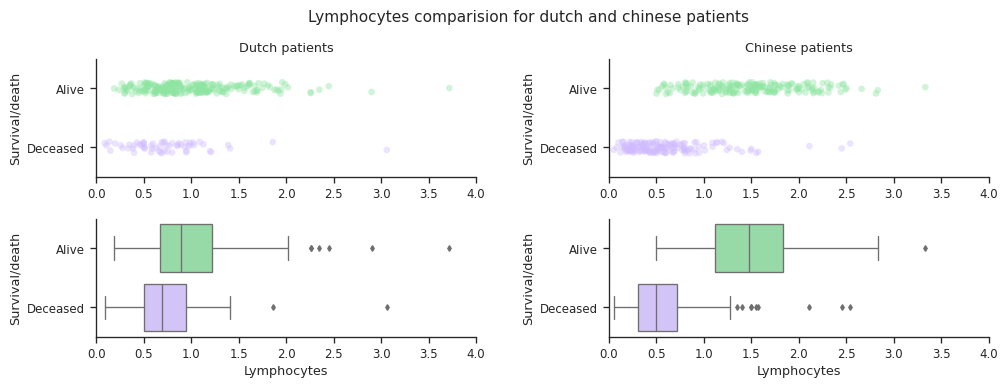

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4))
fig.suptitle("Lymphocytes comparision for dutch and chinese patients")

sns.stripplot(x="Lymphocytes", y="Survival/death",
              data=df_dutch, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][0])
ax[0][0].set_title("Dutch patients")
ax[0][0].set(xlabel="")
ax[0][0].set(xlim=(0, 4))

sns.stripplot(x="lymphocyte count", y=df_chinese["outcome"].astype(str),
              data=df_chinese, dodge=True, alpha=.4, zorder=1, palette=["g", "m"], ax=ax[0][1])
ax[0][1].set_title("Chinese patients")
ax[0][1].set(xlim=(0, 4))
ax[0][1].set(ylabel="Survival/death")
ax[0][1].set_yticklabels(["Alive", "Deceased"])
ax[0][1].set(xlabel="")

sns.boxplot(y="Survival/death", x="Lymphocytes", data=df_dutch, ax=ax[1][0], palette=["g", "m"], linewidth=1, fliersize=3)
ax[1][0].set(xlim=(0, 4))
ax[1][0].set(xlabel="Lymphocytes")

sns.boxplot(y=df_chinese["outcome"].astype(str), x="lymphocyte count", data=df_chinese, ax=ax[1][1], palette=["g", "m"], linewidth=1, fliersize=3)
ax[1][1].set(xlim=(0, 4))
ax[1][1].set(ylabel="Survival/death")
ax[1][1].set_yticklabels(["Alive", "Deceased"])
ax[1][1].set(xlabel="Lymphocytes")

plt.subplots_adjust(wspace=0.35, hspace=0.35, top=0.85)

sns.despine()
fig.savefig('lymph_dutch.png', dpi=fig.dpi)
plt.show()

#### Leukocytes

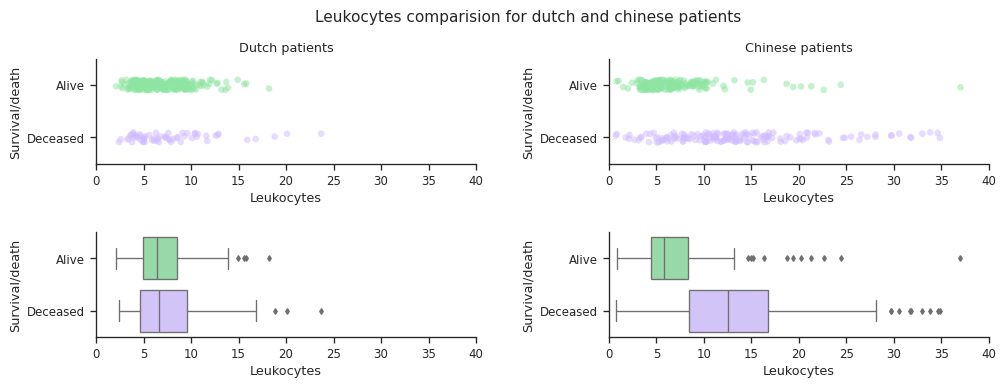

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4))
fig.suptitle("Leukocytes comparision for dutch and chinese patients")

sns.stripplot(x="Leukocytes", y="Survival/death",
              data=df_dutch, dodge=True, alpha=.5, zorder=1, palette=["g", "m"], ax=ax[0][0])
ax[0][0].set_title("Dutch patients")
ax[0][0].set(xlim=(0, 40))

sns.stripplot(x="White blood cell count", y=df_chinese["outcome"].astype(str),
              data=df_chinese, dodge=True, alpha=.5, zorder=1, palette=["g", "m"], ax=ax[0][1])
ax[0][1].set_title("Chinese patients")
ax[0][1].set(xlim=(0, 40))
ax[0][1].set(ylabel="Survival/death")
ax[0][1].set_yticklabels(["Alive", "Deceased"])
ax[0][1].set(xlabel="Leukocytes")


sns.boxplot(y="Survival/death", x="Leukocytes", data=df_dutch, ax=ax[1][0], palette=["g", "m"], linewidth=1, fliersize=3)
ax[1][0].set(xlim=(0, 40))

sns.boxplot(y=df_chinese["outcome"].astype(str), x="White blood cell count", data=df_chinese, ax=ax[1][1], palette=["g", "m"], linewidth=1, fliersize=3)
ax[1][1].set(xlim=(0, 40))
ax[1][1].set(ylabel="Survival/death")
ax[1][1].set_yticklabels(["Alive", "Deceased"])
ax[1][1].set(xlabel="Leukocytes")


plt.subplots_adjust(wspace=0.35, hspace=0.65, top=0.85)

sns.despine()
fig.savefig('leuk_dutch.png', dpi=fig.dpi)
plt.show()

#### C-reactive protein

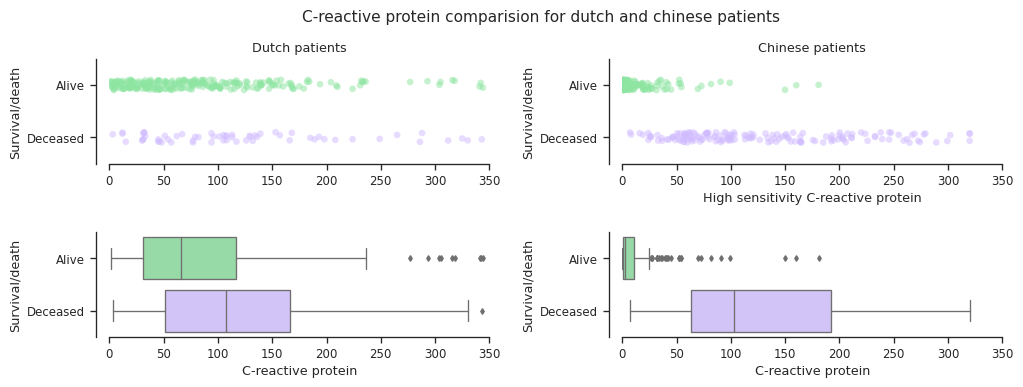

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12, 4))
fig.suptitle("C-reactive protein comparision for dutch and chinese patients")

sns.stripplot(x="CRP", y="Survival/death",
              data=df_dutch, dodge=True, alpha=.5, zorder=1, palette=["g", "m"], ax=ax[0][0])
ax[0][0].set_title("Dutch patients")
ax[0][0].set(xlabel="")
ax[0][0].set(xlim=(0, 350))

sns.stripplot(x="High sensitivity C-reactive protein", y=df_chinese["outcome"].astype(str),
              data=df_chinese, dodge=True, alpha=.5, zorder=1, palette=["g", "m"], ax=ax[0][1])
ax[0][1].set_title("Chinese patients")
ax[0][1].set(ylabel="Survival/death")
ax[0][1].set_yticklabels(["Alive", "Deceased"])
ax[0][1].set(xlim=(0, 350))

sns.boxplot(y="Survival/death", x="CRP", data=df_dutch, ax=ax[1][0], palette=["g", "m"], linewidth=1, fliersize=3)
ax[1][0].set(xlabel="C-reactive protein")
ax[1][0].set(xlim=(0, 350))

sns.boxplot(y=df_chinese["outcome"].astype(str), x="High sensitivity C-reactive protein", data=df_chinese, ax=ax[1][1], palette=["g", "m"], linewidth=1, fliersize=3)
ax[1][1].set(ylabel="Survival/death")
ax[1][1].set_yticklabels(["Alive", "Deceased"])
ax[1][1].set(xlabel="C-reactive protein")
ax[1][1].set(xlim=(0, 350))

plt.subplots_adjust(wspace=0.35, hspace=0.65, top=0.85)

sns.despine(offset={'left': 10})
fig.savefig('crp_dutch.png', dpi=fig.dpi)
plt.show()

There is also a big disproportion in this feature for survivors.